# Lab 3

**Name : Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Objective:** <br>
Clean the given dataset and apply KNN Classifier

### **Problem Statement:** <br>
1) Predict if a person is granted loan or not according to their gender, married status, education, self employment, income, amount of loan, property area and credit history. <br>
2) Predict if a person is self employed or not according to their their gender, married status, education, income, amount of loan, property area, credit history and loan status. <br>
3) Apply KNN on both the problem statement.<br> 
4) Display the Accuracy Score and also show the Predicted output.

### **Methodology:** <br>
* Import text file using open and .read
* Clean the dataframe by dropping null values and replacing index
* Perform Label Encoding
* Perform Model Training and Testing using KNN Classifier
* Display accuracy score and predicted output

### **Result:** <br>
* The model accuracy is 1 at N_neighbours=1 (k value)
* It predicts the correct value at k=1

### **Learnings:** <br>
* This assignment helped me to learn about KNN Classifier
* I got to know the basics of machine learning
* Steps to follow model training, testing and predicting
* How to identify labels
* How to form a problem statement

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |

In [1]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\Loan Dataset.xlsx",index_col=False)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# `DATA CLEANING`

In [3]:
#Checking for null values

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#Dropping null values

df = df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [100]:
#Reset Index
df.reset_index(inplace = True, drop = True)

# `LABEL ENCODING`

In [6]:
Education = LabelEncoder()
df['Education'] = Education.fit_transform(df['Education'])

In [7]:
Loan_Status = LabelEncoder()
df['Loan_Status'] = Loan_Status.fit_transform(df['Loan_Status'])

In [8]:
Gender = LabelEncoder()
df['Gender'] = Gender.fit_transform(df['Gender'])

In [9]:
Married = LabelEncoder()
df['Married'] = Married.fit_transform(df['Married'])

In [10]:
Self_Employed = LabelEncoder()
df['Self_Employed'] = Self_Employed.fit_transform(df['Self_Employed'])

In [11]:
Property_Area = LabelEncoder()
df['Property_Area'] = Property_Area.fit_transform(df['Property_Area'])

In [120]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


<AxesSubplot:>

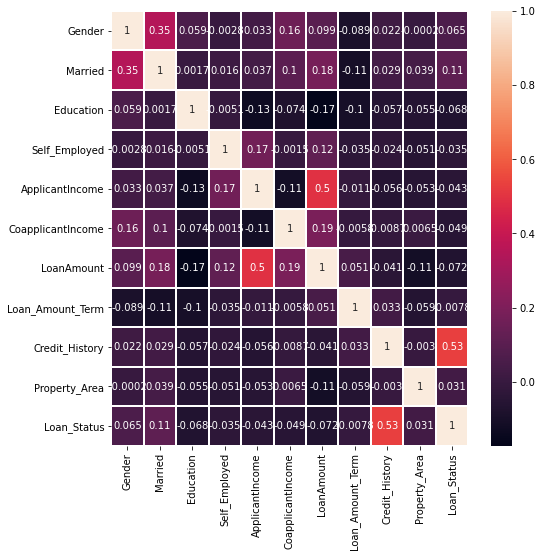

In [126]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True,linewidths=1)

# `MODEL TESTING`

### 1) Predict if a person is granted loan or not according to their gender, married status, education, self employment, income, amount of loan, property area and credit history.

In [106]:
X = df.drop(['Loan_Status','Loan_ID','Dependents'],axis=1)
y = df['Loan_Status']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [108]:
X_train.shape

(336, 10)

In [109]:
knn = KNeighborsClassifier(n_neighbors = 1 , p = 2)

In [110]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [111]:
knn.score(X,y)

1.0

In [112]:
s=[[1,1,0,0,4583,1508.0,128.0,360.0,1.0,0]]
e=[[1,1,0,1,3000,0.0,66.0,360.0,1.0,2]]

In [113]:
d = pd.DataFrame(s)
h = pd.DataFrame(e)

In [114]:
d

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0


In [115]:
h

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,3000,0.0,66.0,360.0,1.0,2


In [116]:
#First row
knn.predict(d)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

**Observation** : It is predicting the correct loan status for the first row which means that the person can be granted loan.

In [128]:
#Second row
knn.predict(h)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

**Observation** : It is predicting the correct loan status for the second row which means that the person cannot be granted loan.

### 2) Predict if a person is self employed or not according to their their gender, married status, education, income, amount of loan, property area, credit history and loan status.

In [79]:
XX = df.drop(['Self_Employed','Loan_ID','Dependents'],axis=1)
yy = df['Self_Employed']

In [80]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3)

In [1]:
knn = KNeighborsClassifier(n_neighbors = 7 , p = 1)

NameError: name 'KNeighborsClassifier' is not defined

In [95]:
knn.fit(XX,yy)

KNeighborsClassifier(n_neighbors=1)

In [96]:
knn.score(XX,yy)

1.0

In [97]:
f=[[1,1,0,4583,1508.0,128.0,360.0,1.0,0,0]]

In [98]:
g=pd.DataFrame(f)

In [99]:
knn.predict(g)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

**Observation** : It is predicting the correct status that the person is